Dataset        Task-1
Task         hotpotqa
Reuse_acc        7.09
Reuse_lat        0.06
CB_p1_acc        8.66
CB_p1_lat       0.166
CB_p2_acc         9.7
CB_p2_lat        0.29
CB_p3_acc        12.5
CB_p3_lat       0.448
DS_p1_acc       34.05
DS_p1_lat    0.234643
DS_p2_acc       36.25
DS_p2_lat    0.377123
DS_p3_acc       38.58
DS_p3_lat     0.46342
Full_acc        37.59
Full_lat         0.73
Name: 3, dtype: object


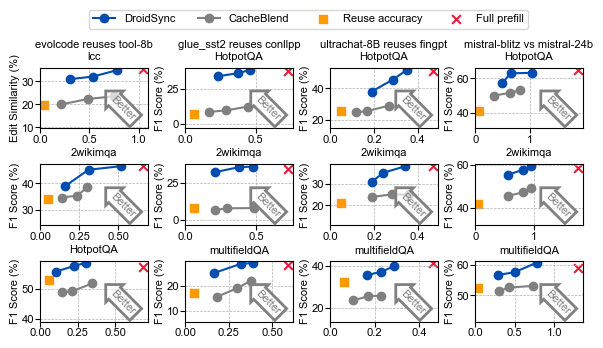

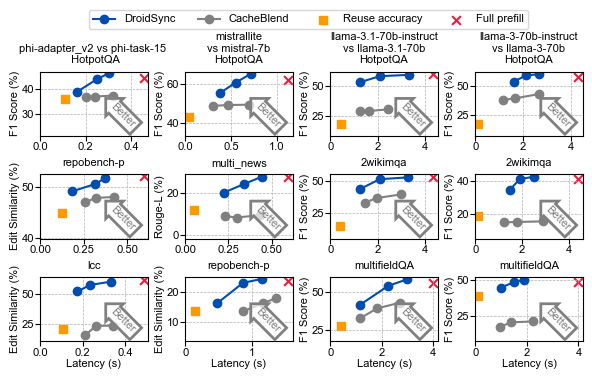

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
font_sz = 8
font = "Arial"
colors = ['#004DAF', '#ED1B3A', '#FF9900', '#33A02C']

RED = colors[1]
GREEN = colors[3]
BLUE = colors[0]
ORANGE = colors[2]

plt.rcParams['font.family'] = font
plt.rcParams['font.size'] = font_sz
# Styling options
def plot_tool_acc_lat(row, ax, title, range=10, xlabel=False, ylabel="F1 Score (%)", legend=False):

    # Extract points
    cacheblend_x = [row['CB_p1_lat'], row['CB_p2_lat'], row['CB_p3_lat']]
    cacheblend_y = [row['CB_p1_acc'], row['CB_p2_acc'], row['CB_p3_acc']]

    droidspeak_x = [row['DS_p1_lat'], row['DS_p2_lat'], row['DS_p3_lat']]
    droidspeak_y = [row['DS_p1_acc'], row['DS_p2_acc'], row['DS_p3_acc']]

    reuse_x, reuse_y = row['Reuse_lat'], row['Reuse_acc']
    full_x, full_y   = row['Full_lat'], row['Full_acc']

    # Create a single subplot

    # Plot lines
    ax.plot(droidspeak_x, droidspeak_y, 'o-', color=BLUE, label='DroidSync')
    ax.plot(cacheblend_x, cacheblend_y, 'o-', color="grey", label='CacheBlend')

    # Plot reuse & full-prefill markers
    ax.scatter([reuse_x], [reuse_y], s=40, marker='s', color=ORANGE, label='Reuse accuracy')
    ax.scatter([full_x], [full_y], s=40, marker='x', color=RED, label='Full prefill')

    # Formatting
    ax.set_title(title, fontsize=font_sz)
    if xlabel:
        ax.set_xlabel("Latency (s)", fontsize=font_sz, labelpad=1)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=font_sz, labelpad=1)
    ax.set_ylim(bottom=min(reuse_y, min(cacheblend_y))-range)
    ax.set_xlim(left=0)
    ax.tick_params(axis='both', which='major', pad=1)  # Default is typically 4
    ax.grid(linestyle='--', linewidth=0.5)
    if legend:
        ax.legend(loc='upper left', fontsize=font_sz, frameon=True, bbox_to_anchor=(0.4, 2.05), ncols=4)
    # Add an arrow annotation with transparency
    bbox_props = dict(boxstyle="larrow", fc=(1, 1, 1, 0.7), ec="grey", lw=2)  # Added alpha for transparency
    ax.text(0.9, 0.1, "Better", ha="right", 
        va="bottom", rotation=-45, bbox=bbox_props, c='grey',
        transform=ax.transAxes
    )

# Load your CSV (skip the two header rows)
cols = [
    'Dataset', 'Task', 'Reuse_acc', 'Reuse_lat',
    'CB_p1_acc', 'CB_p1_lat', 'CB_p2_acc', 'CB_p2_lat', 'CB_p3_acc', 'CB_p3_lat',
    'DS_p1_acc', 'DS_p1_lat', 'DS_p2_acc', 'DS_p2_lat', 'DS_p3_acc', 'DS_p3_lat',
    'Full_acc', 'Full_lat'
]
df = pd.read_csv(
    '../../Downloads/DroidSpeak 0412 - Sheet3.csv',
    skiprows=2,
    header=None,
    names=cols
)
wspace = 0.35
hspace = 0.6
df = df[df['Reuse_acc'].notna()].reset_index(drop=True)
fig, ax = plt.subplots(3, 4, figsize=(7, 3.3))
plt.subplots_adjust(wspace=wspace, hspace=hspace)

# ax[0,0].legend(loc='upper left', bbox_to_anchor=(1, 1))
# Choose the row you want to plot; e.g., first row:
plot_tool_acc_lat(df.iloc[0], ax[0, 0], "evolcode reuses tool-8b\nlcc", legend=True, ylabel="Edit Similarity (%)")
plot_tool_acc_lat(df.iloc[1], ax[1, 0], "2wikimqa")
plot_tool_acc_lat(df.iloc[2], ax[2, 0], "HotpotQA")

print(df.iloc[3])

plot_tool_acc_lat(df.iloc[3], ax[0, 1], "glue_sst2 reuses conllpp\nHotpotQA")
plot_tool_acc_lat(df.iloc[5], ax[1, 1], "2wikimqa")
plot_tool_acc_lat(df.iloc[4], ax[2, 1], "multifieldQA")


plot_tool_acc_lat(df.iloc[6], ax[0, 2], "ultrachat-8B reuses fingpt\nHotpotQA")
plot_tool_acc_lat(df.iloc[7], ax[1, 2], "2wikimqa")
plot_tool_acc_lat(df.iloc[8], ax[2, 2], "multifieldQA")


plot_tool_acc_lat(df.iloc[9], ax[0, 3], "mistral-blitz vs mistral-24b\nHotpotQA")
plot_tool_acc_lat(df.iloc[10], ax[1, 3], "2wikimqa")
plot_tool_acc_lat(df.iloc[11], ax[2, 3], "multifieldQA")

plt.savefig(f"overall-upper.pdf", bbox_inches="tight")

fig, ax = plt.subplots(3, 4, figsize=(7, 3.5))
plt.subplots_adjust(wspace=wspace, hspace=hspace)
plot_tool_acc_lat(df.iloc[12], ax[0, 0], "phi-adapter_v2 vs phi-task-15 \n HotpotQA", range=15, legend=True)
plot_tool_acc_lat(df.iloc[13], ax[1, 0], "repobench-p", range=5, ylabel="Edit Similarity (%)")
plot_tool_acc_lat(df.iloc[14], ax[2, 0], "lcc", range=5, xlabel=True, ylabel="Edit Similarity (%)")


plot_tool_acc_lat(df.iloc[15], ax[0, 1], "mistrallite\nvs mistral-7b\nHotpotQA", range=10)
plot_tool_acc_lat(df.iloc[16], ax[1, 1], "multi_news", range=10, ylabel="Rouge-L (%)")
plot_tool_acc_lat(df.iloc[17], ax[2, 1], "repobench-p", range=10, xlabel=True, ylabel="Edit Similarity (%)")


plot_tool_acc_lat(df.iloc[18], ax[0, 2], "llama-3.1-70b-instruct\nvs llama-3.1-70b\nHotpotQA")
plot_tool_acc_lat(df.iloc[19], ax[1, 2], "2wikimqa")
plot_tool_acc_lat(df.iloc[20], ax[2, 2], "multifieldQA", xlabel=True)


plot_tool_acc_lat(df.iloc[21], ax[0, 3], "llama-3-70b-instruct\nvs llama-3-70b\nHotpotQA")
plot_tool_acc_lat(df.iloc[23], ax[1, 3], "2wikimqa")
plot_tool_acc_lat(df.iloc[22], ax[2, 3], "multifieldQA", xlabel=True)

plt.savefig(f"overall-lower.pdf", bbox_inches="tight")